## Scikit learn workflow

1.) Get Data Ready

2.) Pick a Model

3.) Fit Model into the Data and make prediction

4.) Evaluate the model

5.) Improve the model through experimentation

6.) Save and reload the model

## What is machine learning

Machines do not understand words, or images, so how do we teach a machine to learn about the world

Machile learning Algo 

Input - Function (ML Model) - Output

Humans give the answers or at least the projected answer, the computer then works backwards to create a model that will generate the expected results.





0. End to End Scikit workflow
1. Getting the data ready
2. Choose the right algo for the problems
3. Fit the model and make predictions about the data
4. Evaluate the model
5. Improve the modle
6. sava and load a trained model
7. Put it all together


## 0. end to end Scikit learn workflow


In [5]:
# Get the data ready
import pandas as pd

import numpy as np

heart_disease = pd.read_csv("heart-disease.csv")

heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [152]:
## create the features matrix
x = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

In [55]:
import warnings

warnings.filterwarnings("default")

In [148]:
# Chose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit model to training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

NameError: name 'x' is not defined

In [155]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [156]:
# 3. make prediction, prediction happens on test data after the model has been fitted
# data must be the same type as the training data.
y_preds = clf.predict(x_test);


## 2 ways to make predictison
1. predict
2. predict_proba



In [165]:
y_preds, np.mean(y_preds == y_test)


(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 np.float64(0.8524590163934426))

In [167]:
# Compare predictison to truth labels to eveluate the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test), clf.score(x_test, y_test)

(np.float64(0.8524590163934426), 0.8524590163934426)

In [159]:
## evaluate the model since this is done with training data the return should be 1.0.
clf.score(x_train, y_train)

1.0

In [160]:
## this is done with test data so the score will be lower than training data
clf.score(x_test, y_test)



0.8524590163934426

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.85      0.90      0.88        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [32]:
confusion_matrix(y_test, y_preds)

array([[26, 11],
       [ 5, 19]])

In [63]:
# 5. Improve the model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying models with {i} estimators ...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model Accurancy on Test set: {clf.score(x_test, y_test) * 100 : .2f}%")
    print(" ")

Trying models with 10 estimators ...
Model Accurancy on Test set:  78.69%
 
Trying models with 20 estimators ...
Model Accurancy on Test set:  85.25%
 
Trying models with 30 estimators ...
Model Accurancy on Test set:  81.97%
 
Trying models with 40 estimators ...
Model Accurancy on Test set:  86.89%
 
Trying models with 50 estimators ...
Model Accurancy on Test set:  83.61%
 
Trying models with 60 estimators ...
Model Accurancy on Test set:  83.61%
 
Trying models with 70 estimators ...
Model Accurancy on Test set:  81.97%
 
Trying models with 80 estimators ...
Model Accurancy on Test set:  86.89%
 
Trying models with 90 estimators ...
Model Accurancy on Test set:  80.33%
 


In [36]:
# 6. Save model and Load it
import pickle

pickle.dump(clf, open("Random Forest.pkl", "wb"))

In [54]:
## how to deal with warnings in jupyter

import warnings
warnings.filterwarnings("default")

In [46]:
from sklearn import sklearn

In [48]:
sklearn.show_versions()


System:
    python: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 12:55:35) [Clang 14.0.6 ]
executable: /Users/alfonso/My First Conda AI/env/bin/python
   machine: macOS-14.7-arm64-arm-64bit-Mach-O

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0
   setuptools: 72.1.0
        numpy: 2.2.2
        scipy: 1.15.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: /Users/alfonso/My First Conda AI/env/lib/libopenblasp-r0.3.21.dylib
        version: 0.3.21
threading_layer: pthreads
   architecture: armv8

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: libomp
       filepath: /Users/alfonso/My First Conda AI/env/lib/libomp.dylib
        version: None


0. End to End Scikit workflow
1. Getting the data ready
2. Choose the right algo for the problems
3. Fit the model and make predictions about the data
4. Evaluate the model
5. Improve the modle
6. sava and load a trained model
7. Put it all together

## Getting data ready for use with ML

1. Split data into features and labels (x, y)
2. Filling (inputing or disregarding missing values)
3. Converting non numerical values to numerical values (feature encoding)



In [168]:
# Get the data set
import pandas as pd

heart_disease = pd.read_csv("heart-disease.csv")

In [169]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Create Features and labels
X = heart_disease.drop("target", axis=1) # drop column target since this will be the label

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Workflow breakdown (Data Setup)
Clean Data -> Transform Data -> Reduce Data

<b>Transform Data</b> - information must be converted into numbers.  Machines do not deal with string values or any other data type

<b>Reduce Data</b> - Having too much data can be counter beneficial and not yield any better results so having the proper amount of data is more important than having a lot of it


## Make numerical data


In [18]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [19]:
len(car_sales)

1000

In [20]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split the data
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor # predicts a number

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: could not convert string to float: 'Toyota'

In [35]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)

transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [48]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]], dtype="int")



In [49]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [47]:
dummies.dtypes

Doors           int64
Make_BMW         bool
Make_Honda       bool
Make_Nissan      bool
Make_Toyota      bool
Colour_Black     bool
Colour_Blue      bool
Colour_Green     bool
Colour_Red       bool
Colour_White     bool
dtype: object

In [57]:
# refit the model using transformed_X as it was the data converted from strings to numbers (floats)
import numpy as np

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.3235867221569877

### What if the data had missing values?

1. Fill them with values (imputation)
2. Remove samples with missing values

In [58]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [103]:
# Import csv with missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [104]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [105]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [129]:

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

## convert missing data to numbers
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)

transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [107]:
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [141]:
# Use the new method style instead of directly updating the Dataframe

car_sales_missing.fillna( {"Make": "missing"}, inplace=True)
car_sales_missing.fillna( {"Colour": "missing"}, inplace=True)

car_sales_missing.fillna( {"Odometer (kM)": car_sales_missing["Odometer (KM)"].mean()}, inplace=True)

car_sales_missing.fillna( {"Doors" : 4}, inplace=True)



In [142]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [145]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [110]:
car_sales_missing["Make"]

0       Honda
1         BMW
2       Honda
3      Toyota
4      Nissan
        ...  
995    Toyota
996       NaN
997    Nissan
998     Honda
999    Toyota
Name: Make, Length: 1000, dtype: object

In [128]:
missing_4doors = car_sales_missing[car_sales_missing["Doors"].isnull()]

len(missing_4doors)

50

In [112]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [172]:
# predict_proba returns probabilities of classification label basically saying what is the probability that the ML model predicted correctly

clf.predict_proba(x_test[: 5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [174]:
# predict on the same data but with predict the label is returned which just returns a value of true or false but does not give details on the
# probability of the response. Predict forces the model to return the label even if it's just marginally probable.

clf.predict(x_test[: 5])

array([0, 1, 1, 0, 1])

In [177]:
# predicting CA housing prices
# predict method can also be used on regression models

# Decision Tree, that is what scikit learn under the hood works for RandomForestRegressor, RandomForestClassifier

# Chose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model (Train the model), this must happen before the model can be scored.  The fit is done on the training data. 
# You want training data to be much larger than test data.
clf.fit(X_train, y_train)

# Score the model, scorring happens on test data.  Test data is data that has not been seen by the model before
# Use the pattern the model learned
clf.score(X_test, y_test)


0.8524590163934426

In [180]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [70]:
# Data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing

housing;

# Chose the right model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model (Train the model), this must happen before the model can be scored.  The fit is done on the training data. 
# You want training data to be much larger than test data.
clf.fit(X_train, y_train)

# Score the model, scorring happens on test data.  Test data is data that has not been seen by the model before
# Use the pattern the model learned
clf.score(X_test, y_test)


ValueError: Found input variables with inconsistent numbers of samples: [242, 61]

In [79]:
# Data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing();

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [75]:
# create the data frame
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [73]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [80]:
housing_df["target"] = housing["target"]

In [81]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [219]:
# to consistent values
np.random.seed(42)

# Get the data for X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Choose the right model, this will require experimentation with different models and see what gives best results

# Try linear model
from sklearn.linear_model import Ridge
linear_model = Ridge()

# Create the regressor
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor()

# split the data Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Coefficient of Determination
# Statistical meassurement that examines how strong the linear relationship is between two variables.

# Fit the model (train it) with linear model
# linear_model.fit(X_train, y_train)

# Check the score of the linear model
# linear_model.score(X_test, y_test)

#lets try this with a regressor
# RandomForest is a combination of lots of decision trees. Default value uses 100 different decision trees.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

regressor.score(X_test, y_test)


0.8059809073051385

## Lets do a Classification model 


In [220]:
# iris data se

from sklearn.datasets import load_iris
iris = load_iris();

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [221]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])

In [222]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [223]:
iris_df["target"] = iris["target"]

In [224]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [225]:
# Create features and Target variables
X = iris_df.drop("target", axis=1)
y = iris_df["target"]

In [226]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# Pick the model for this problemp
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.8916666666666667

In [233]:
y_preds = model.predict_proba(X_test)
y_preds

array([[0.  , 0.18, 0.82],
       [0.  , 0.96, 0.04],
       [0.  , 0.06, 0.94],
       [0.83, 0.17, 0.  ],
       [0.  , 0.63, 0.37],
       [0.  , 0.06, 0.94],
       [0.99, 0.01, 0.  ],
       [0.84, 0.16, 0.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.03, 0.97, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.03, 0.97, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.48, 0.52],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [0.01, 0.69, 0.3 ],
       [0.  , 0.92, 0.08],
       [0.  , 0.92, 0.08],
       [0.  , 0.63, 0.37],
       [0.  , 0.05, 0.95],
       [1.  , 0.  , 0.  ],
       [0.29, 0.71, 0.  ],
       [0.  , 0.63, 0.37],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.57, 0.43],
       [0.  , 0.92, 0.08],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.01, 0.99],
 

In [228]:
y_test

114    2
68     1
136    2
36     0
70     1
      ..
14     0
32     0
122    2
5      0
52     1
Name: target, Length: 120, dtype: int64

In [231]:
y_preds_df = pd.DataFrame(y_preds, columns=iris["target_names"])

In [237]:
np.histogram(y_test)

(array([38,  0,  0,  0,  0, 42,  0,  0,  0, 40]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]))

In [238]:
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [252]:
heart_disease = pd.read_csv("heart-disease.csv")

# structure data use ensemble models
# unstructured data use deep learning or transfer learning

# Regression and Classification are usually the two most common problems

from sklearn.ensemble import RandomForestClassifier

# this is done to get consistent results and it's done before generating the data
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# instantiate the model
model = RandomForestClassifier(n_estimators=100)

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# train the model also known as fit
model.fit(X_train, y_train)

# Evaluate the modle make the predictions on the data (use the model)
model.score(X_test, y_test)

0.7892561983471075

In [242]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [260]:
### Make predictions using the trained model predictions are the values of the predicted labels. 
# in this case the predictions are heart_diseas or no
y_preds = model.predict(X_test)

In [263]:
np.array(y_preds)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [262]:
np.mean(y_preds == y_test)

np.float64(0.7892561983471075)

In [269]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7892561983471075

In [275]:
## Predict proba, the probability that the label is correct
y_probs = model.predict_proba(X_test)


In [341]:
## Back to the housing data

from sklearn.ensemble import RandomForestRegressor

# this is done to get consistent results and it's done before generating the data
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# instantiate the model
model = RandomForestRegressor(n_estimators=100)

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# train the model also known as fit
model.fit(X_train, y_train)

# make prediction
y_preds = model.predict(X_test)

# Evaluate the modle make the predictions on the data (use the model)
#model.score(X_test, y_test)


In [343]:
y_preds[:10]

array([1.25259  , 3.912062 , 1.96667  , 0.94987  , 1.6602904, 3.1793803,
       1.66849  , 4.4572822, 1.46224  , 2.98579  ])

In [346]:
y_test

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: target, Length: 16512, dtype: float64

In [345]:
np.array(y_test[:10])

array([1.03   , 3.821  , 1.726  , 0.934  , 0.965  , 2.648  , 1.573  ,
       5.00001, 1.398  , 3.156  ])

In [347]:
# mean absolute error average differencew between predicted value and the true value.
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.37907945563226764

In [359]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [363]:
X_test["preds"] = y_preds * 100000

In [364]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,preds
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,125259.00
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,391206.20
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,196667.00
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,94987.00
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,166029.04
...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,306176.01
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,133319.00
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,172081.00
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,247754.01


In [367]:
y_test

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: target, Length: 16512, dtype: float64

## Sci kit learn Estimators

* 4. Evaluate the model


In [368]:
## Three main ways
# 1. score() Estimator score method
# 2. scoring param
# 3. problem specific metric functions (depends on the model you choose)



In [369]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [379]:
heart_disease = pd.read_csv("heart-disease.csv")

# using the score method
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)


RandomForestClassifier()

In [381]:
model.score(X_test, y_test)

0.7892561983471075

In [388]:
# score method on regression problem
## Back to the housing data

from sklearn.ensemble import RandomForestRegressor

# this is done to get consistent results and it's done before generating the data
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# instantiate the model
model = RandomForestRegressor(n_estimators=50)

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# train the model also known as fit
model.fit(X_train, y_train)

# Evaluate the modle make the predictions on the data (use the model)
model.score(X_test, y_test)

0.7616412463450868

In [391]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [396]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

# this is done to get consistent results and it's done before generating the data
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# train the model also known as fit
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.7616412463450868

In [397]:
# allows to compare across different splits of test and train data still maintaining the test_size
# the splits are randomized to remove bias from the data
np.random.seed(42)
cross_val_score(model, X, y, scoring=None)

array([0.492416  , 0.70349381, 0.7346482 , 0.62043991, 0.67662339])

## Classification model evaluations

1. Accuracy
2. Area Under ROC curve
3. Confusion Matrix
4. Classification Report

In [8]:
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv("heart-disease.csv")


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

cross_val_score = cross_val_score(model, X, y)

np.mean(cross_val_score)

np.float64(0.811639344262295)

In [405]:
print(f"Accuracy ::  {np.mean(cross_val_score) * 100:.2f}%")

Accuracy ::  81.16%


In [35]:
## Area under ROC curve (AUC/ROC) Receiver Operating Charateristic

# comparison of true positive rate TPR vs False positive rate FPR
# true positive predict 1 when truth = 1
# false positive predict 1 when truth = 0
# true negative predict 0 when truth = 0
# false negative predict 0 when truth  =1

from sklearn.metrics import roc_curve

# train the model
model.fit(X_train, y_train)

# make predictions
# y_probs = model.predict_proba(X_test)

y_probs = model.predict_proba(X_test)

len(y_probs), y_probs[:10]



(242,
 array([[0.1 , 0.9 ],
        [0.86, 0.14],
        [0.27, 0.73],
        [0.17, 0.83],
        [0.67, 0.33],
        [0.3 , 0.7 ],
        [0.24, 0.76],
        [0.28, 0.72],
        [0.08, 0.92],
        [0.05, 0.95]]))

In [11]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.94, 0.12, 0.75, 0.78, 0.34, 0.64, 0.67, 0.66, 0.88, 0.99])

In [412]:
## roc_curve takes the y_probs positive values which come from predict_proba(Test data).

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [415]:
fpr

array([0.        , 0.        , 0.00917431, 0.00917431, 0.00917431,
       0.00917431, 0.00917431, 0.00917431, 0.00917431, 0.00917431,
       0.01834862, 0.01834862, 0.03669725, 0.03669725, 0.04587156,
       0.04587156, 0.05504587, 0.05504587, 0.06422018, 0.06422018,
       0.0733945 , 0.0733945 , 0.10091743, 0.11009174, 0.11009174,
       0.12844037, 0.12844037, 0.13761468, 0.13761468, 0.17431193,
       0.17431193, 0.19266055, 0.19266055, 0.21100917, 0.22018349,
       0.23853211, 0.25688073, 0.25688073, 0.26605505, 0.27522936,
       0.29357798, 0.29357798, 0.30275229, 0.32110092, 0.33944954,
       0.34862385, 0.36697248, 0.39449541, 0.41284404, 0.42201835,
       0.42201835, 0.44036697, 0.44954128, 0.47706422, 0.49541284,
       0.50458716, 0.52293578, 0.5412844 , 0.55045872, 0.56880734,
       0.60550459, 0.64220183, 0.67889908, 0.72477064, 0.73394495,
       0.75229358, 0.77981651, 0.79816514, 0.8440367 , 0.85321101,
       0.88990826, 0.91743119, 0.9266055 , 0.96330275, 0.97247

In [12]:
# Plot ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots ROC curve given FPR and TPR
    """

    # Plot it
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("FPR (False Positive Rate)")
    plt.ylabel("TPR (True Positive Rate)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    

In [61]:
## Lets see what happens if we do it with the positive values
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

## get the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


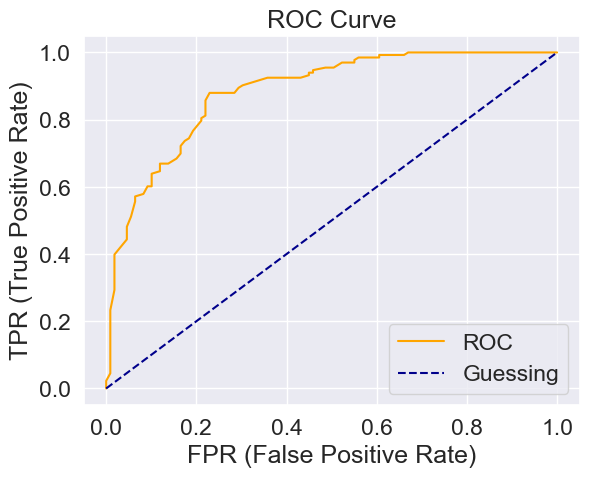

In [62]:
plot_roc_curve(fpr, tpr)

In [56]:
## Lets see what happens if we do it with the negavite values
y_probs_negative = y_probs[:, 0]
y_probs_negative[:10]

## get the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_negative)


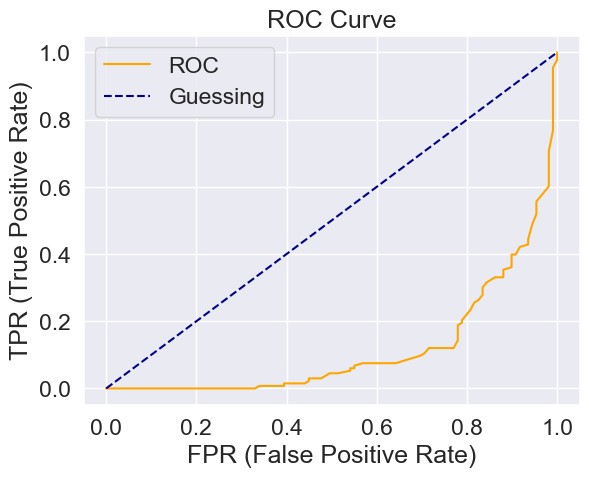

In [57]:
plot_roc_curve(fpr, tpr)

In [47]:
### ROC AUC SCORE

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8968062357729185)

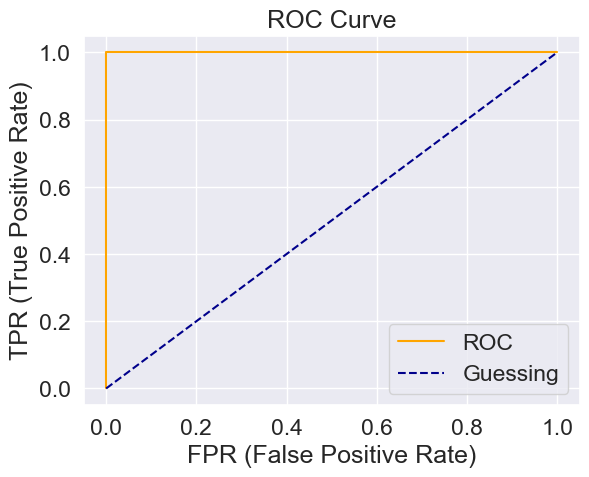

In [48]:
y_probs_negative = y_probs[:, 0]

# perfect score (extremely unlikely) model most likely corrupted
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

## Confusion Matrix



In [14]:
from sklearn.metrics import confusion_matrix

# make prediction
y_preds = model.predict(X_test)

In [17]:
# compare the y_test (truth) with the predictions, binary classifications.  We are predicting just true or false
# but the matrix can be any size.

confusion_matrix(y_test, y_preds) 

array([[ 72,  37],
       [  8, 125]])

In [451]:
# Visualize it with crosstab
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,72,37
1,8,125


In [452]:
y_test

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [453]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Evaluate ML model with confusion matrix and map it with Seaborn


<Axes: >

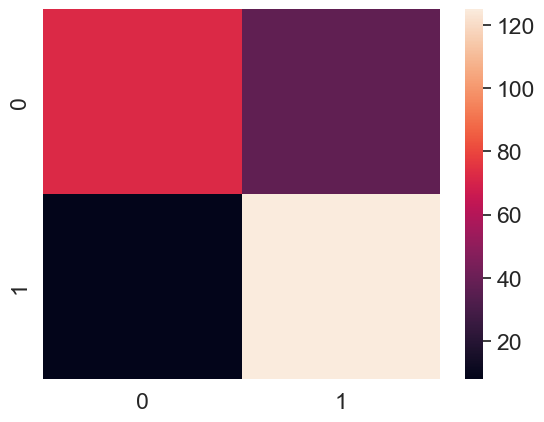

In [50]:
import seaborn  as sns

# font
sns.set(font_scale=1.5)

# Create confusion Matrix using train model and predictions made with predict_proba
conf_mat = confusion_matrix(y_test, y_preds)

# confusion matrix can deal with big number of classes 

sns.heatmap(conf_mat)


<b> Confusion Matrix

Evaluate a classification model with a confusion matrix

A confusion matrix compares predicted labels to truth labels it was supposed to predict

This gives users an idea on where model gets confused

In [18]:
import sklearn
sklearn.__version__

'1.6.1'

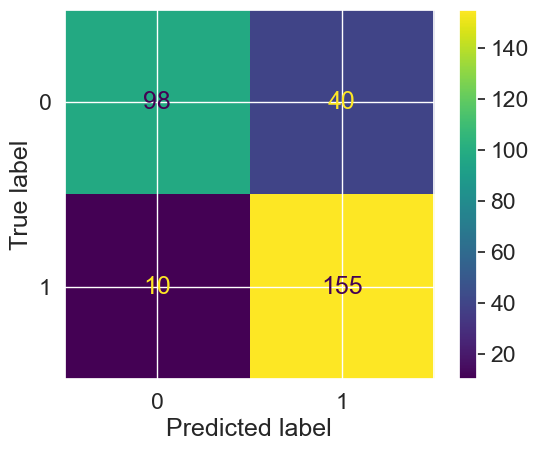

In [63]:
## Two ways to show this data
# 1. From Estimator
# 2. From Predictions

from sklearn.metrics import ConfusionMatrixDisplay # this is fairly new but shows things much better than seaborn

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y); # From estimator the values are the entire X features and the Y labels

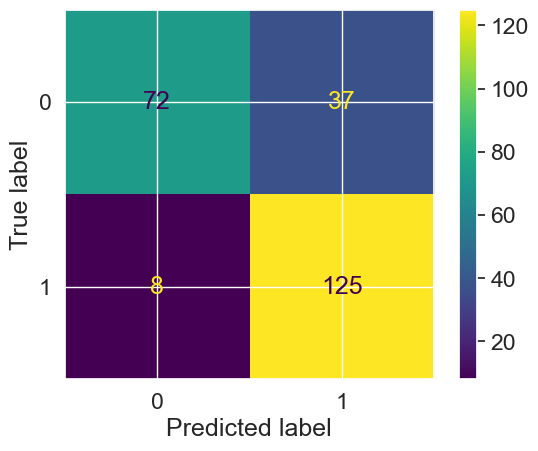

In [53]:
## From Predictions, This may be a better way because it uses the predictions instead of the entire data set
## y_true: the test data
## y_pred: the predicted labels

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

* Classification Report

In [26]:
### Reporting the classifications
## use the test data with preditions to get this representation

## Recall - the positive values correctly classified.  If not false negatives where classified
## F1 Score - Combination of precission and Recall
## Support - Number of samples each metric was calculated on
## Accuracy - How accurate was the model's predictions
## Macro Avg - Avg precission/recall/f1-scores - this metric is important if your model has class imbalances.
## meaning that you have a larger amount of on class or another.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       109
           1       0.77      0.94      0.85       133

    accuracy                           0.81       242
   macro avg       0.84      0.80      0.80       242
weighted avg       0.83      0.81      0.81       242



In [65]:
### Reasons to not just relly on accuracy
## Example

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))


/Users/alfonso/My First Conda AI/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alfonso/My First Conda AI/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alfonso/My First Conda AI/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Regression Model Evaluation Matrix
## 4.2.2

1. R^2 (r-squared) Coefficient of Determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)

In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

len(housing_df)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=.2)

model.fit(X_train, y_train)




RandomForestRegressor()

In [90]:
## get the coefficient of determination due to it being a Regression model
## the prodiction here is the r2 score
model.score(X_test, y_test)

0.7682944577757367

In [91]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
y_test

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: target, Length: 16512, dtype: float64

In [94]:
y_test.mean()

np.float64(2.071946937378876)

In [96]:
## Regression model evaluation
# R2 compares the models predictions to the mean of the target
# 1.0 is a perfect score 0 is the worst model

from sklearn.metrics import r2_score

# fill array with 
y_test_mean = np.full(len(y_test), y_test.mean())


In [97]:
y_test_mean[: 10]

array([2.07194694, 2.07194694, 2.07194694, 2.07194694, 2.07194694,
       2.07194694, 2.07194694, 2.07194694, 2.07194694, 2.07194694])

In [98]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [99]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [144]:
## Evaluation with Mean Absolute error
## compares the mean data of the prediction with the truth
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
y_preds, y_test[0:1]

mae = mean_absolute_error(y_test, y_preds)


In [145]:
mae

0.37907945563226764

In [172]:
## Create a data frame from two different arrays
compare_df = pd.DataFrame(data={"actual": y_test, "predicted": y_preds})

compare_df["differences"] = compare_df["predicted"] - compare_df["actual"]

In [150]:
compare_df

,actual,predicted,differences
14196,1.030,1.252590,0.222590
8267,3.821,3.912062,0.091062
17445,1.726,1.966670,0.240670
14265,0.934,0.949870,0.015870
2271,0.965,1.660290,0.695290
...,...,...,...
11284,2.292,3.061760,0.769760
11964,0.978,1.333190,0.355190
5390,2.221,1.720810,-0.500190
860,2.835,2.477540,-0.357460


In [153]:
np.abs(compare_df["differences"]).mean()

np.float64(0.37907945563226764)

In [155]:
np.abs(y_test - y_preds)


14196    0.222590
8267     0.091062
17445    0.240670
14265    0.015870
2271     0.695290
           ...   
11284    0.769760
11964    0.355190
5390     0.500190
860      0.357460
15795    0.177819
Name: target, Length: 16512, dtype: float64

In [162]:
### Evaluating the model with mean square error
### MSE amplifies outliers
### MSE is lower than MAE that is a good indicator that you have a good model
from sklearn.metrics import mean_squared_error

## this can happen after the model is trained
y_preds = model.predict(X_test)
y_preds

mse_results = mean_squared_error(y_test, y_preds)
mse_results

0.30973892039625023

In [166]:
compare_df = pd.DataFrame(data={"actual": y_test, "predicted": y_preds})
## standard deviaton compares how far appart the values are from the mean (average)
np.std(compare_df, axis=1)

14196    0.111295
8267     0.045531
17445    0.120335
14265    0.007935
2271     0.347645
           ...   
11284    0.384880
11964    0.177595
5390     0.250095
860      0.178730
15795    0.088909
Length: 16512, dtype: float64

In [173]:
compare_df["sqr_diff"] = np.square(compare_df["differences"])

In [175]:
compare_df

,actual,predicted,differences,sqr_diff
14196,1.030,1.252590,0.222590,0.049546
8267,3.821,3.912062,0.091062,0.008292
17445,1.726,1.966670,0.240670,0.057922
14265,0.934,0.949870,0.015870,0.000252
2271,0.965,1.660290,0.695290,0.483429
...,...,...,...,...
11284,2.292,3.061760,0.769760,0.592531
11964,0.978,1.333190,0.355190,0.126160
5390,2.221,1.720810,-0.500190,0.250190
860,2.835,2.477540,-0.357460,0.127778


### Using the Scoring parameter for evaluation


In [179]:
### Estimators score method for Classfication use the accuracy metric for Regrssion they use the R2 as the defaults

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier()
np.random.seed(42)

## Cross validation accuracy, split X, y into 5 different training sets)
## this is a good idea so that different arragements of test and train data are exxamined and trained against.
## this will give a better indicator of how model would do in the wild
cv_acc = cross_val_score(model, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [180]:
## Change the scoring method
print(f"The cross validate accuracy is: {np.mean(cv_acc) * 100: .2f}%")

The cross validate accuracy is:  82.48%


In [182]:
## use Accuracy, this will be the same as the default with None
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [187]:
## Lets try this with Precission
## this tests the model against the positive identifications so true possitives
np.random.seed(42)
cv_pre = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_pre

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [188]:
## Lets try this with Recall
## this tests the proportion of actual posstives (correct predictions) in the trained model so the less false negatives the better the model performs.
np.random.seed(42)
cv_rec = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_rec

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [194]:
## Scoring Parameter for Regression problem
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

r2_cv_scores = cross_val_score(model, X, y, cv=5, scoring=None)
r2_cv_scores



array([0.51648146, 0.70255896, 0.74089371, 0.61492293, 0.68335489])

In [197]:
## Socoring Regression with MSE
## the higher the values the better the model on all the scoring parameter
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.4623413071917715)

In [198]:
## Socoring Regression with MAE
## the higher the values the better the model on all the scoring parameter
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-0.483750755377907)

In [225]:
## Third way to evaluate sklearn with the skleanr.metrics function

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data (position is important X_train, X_test, y_train, y_test0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Create and Train the model
# model gets train on train split
model = RandomForestClassifier();
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

## evaluate using accuracy_score
acc_score = accuracy_score(y_test, y_preds)
print(f"Accuracy Score :: {acc_score * 100: .2f}%")

## evaluate using precision score
prec_score = precision_score(y_test, y_preds)
print(f"Precision Score :: {prec_score}")

## evaluate using recall score
rec_score = recall_score(y_test, y_preds)
print(f"Recall Score :: {rec_score}")

## evaluate using f1 score
f1_res = f1_score(y_test, y_preds)
print(f"F Score :: {f1_res}")

## Using a dictionary to create a data frame, diectionary are hasmaps
compare_df = pd.DataFrame(data={"actual": y_test, "predicted": y_preds})
compare_df


Accuracy Score ::  85.25%
Precision Score :: 0.8484848484848485
Recall Score :: 0.875
F Score :: 0.8615384615384616


,actual,predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


In [231]:
## Do the Same for Regression using the specific evaluation metrics for regression model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split the data (position is important X_train, X_test, y_train, y_test0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Create and Train the model
# model gets train on train split
model = RandomForestRegressor();
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

## evaluate using r2_score
r2_res = r2_score(y_test, y_preds)
print(f"R2 Score :: {r2_res}")

## evaluate with MAE (mean absolute error)
mae_res = mean_absolute_error(y_test, y_preds)
print(f"MAE Score :: {mae_res}")

## evaluate with MSQ (mean squared error)
mse_res = mean_squared_error(y_test, y_preds)
print(f"MSE Score :: {mse_res}")


R2 Score :: 0.8059809073051385
MAE Score :: 0.3270458119670544
MSE Score :: 0.2542443610174998


## 5. Improving a model

* First Prediction - Baseline Prediction
* First Model - Baseline model

From data side
* Could we collect more data? (generally, the more data, the better)
* Could data be improved? (instead of more samples, more info on each sample)

From models side
* Is there a better model to use (linear vs ensemble)
* Can current model be improved? (change hyperparameters

Parameters = models finds patternss in data

Hyperparameters = (function parameters) settings on the model that user can adjust that may improve it's ability to find patterns

Three ways to adjust hyperparmetrs
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [236]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning Hyperparmeters by hand

1. Train
2. Tune
3. Evaluate

In [237]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Next step is to adjust the following params

* maxdepth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [260]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels, vs y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)
                  }
    print(f"Acc :: {accuracy * 100:.2f}%") ## show accuracy in %
    print(f"Precision :: {precision:.2f}")
    print(f"Recall :: {recall:.2f}")
    print(f"F1 :: {f1:.2f}")

    return metric_dict

In [263]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

## shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

## Split amoungs for training and validation
train_split = round(.7 * len(heart_disease_shuffled))
valid_split = round(train_split + .15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

## check the splits
print(f"{len(X_train)}, {len(X_valid)}, {len(X_test)}")

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

y_preds = model.predict(X_valid)

## Evaluate predictions Baseline is generally executed on the validation split
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


212, 45, 46
Acc :: 80.00%
Precision :: 0.77
Recall :: 0.92
F1 :: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [266]:
np.random.seed(42)

model2 = RandomForestClassifier(n_estimators=100)


## make predictions
model2.fit(X_train, y_train)
y_preds = model2.predict(X_valid)

## Evaluate predictions Baseline is generally executed on the validation split
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc :: 80.00%
Precision :: 0.83
Recall :: 0.80
F1 :: 0.82


{'accuracy': 0.8, 'precision': 0.83, 'recall': 0.8, 'f1': 0.82}

In [270]:
## Adjust max_depth
np.random.seed(42)

model3 = RandomForestClassifier(n_estimators=100, max_depth=5)

## make predictions
model3.fit(X_train, y_train)
y_preds = model3.predict(X_valid)

## Evaluate predictions Baseline is generally executed on the validation split
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc :: 82.22%
Precision :: 0.81
Recall :: 0.88
F1 :: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Adjusting settings with Randomized Search CV

In [271]:
from sklearn.model_selection import RandomizedSearchCV

## Grid for param distribution param value.
grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "n_estimators": [100, 200, 500, 1000, 1200],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 4, 6],
    "max_features": ["auto", "sqrt"]
}

np.random.seed(42)

# split into X and y
## shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into Train and Text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model = RandomForestClassifier(n_jobs=1)

# Setup Randomized Search CV
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=10, # numberr of models to try
                              cv=5, verbose=2)

rs_model.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_est

/Users/alfonso/My First Conda AI/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alfonso/My First Conda AI/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alfonso/My First Conda AI/env/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/alfonso/My First Co

In [272]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [280]:
## Make predictions with best hyperparm combo
rs_ypreds = rs_model.predict(X_test)

## Evaluate predictions
random_search_metrics = evaluate_preds(y_test, rs_ypreds)

Acc :: 80.33%
Precision :: 0.84
Recall :: 0.79
F1 :: 0.81


## 5.3 using Grid Search CV to tune the hyperparams

In [275]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'n_estimators': [100, 200, 500, 1000, 1200],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'max_features': ['auto', 'sqrt']}

In [276]:
grid2 = {'max_depth': [None, 5],
 'n_estimators': [100, 200, 500],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [6],
 'max_features': ['sqrt']}

In [277]:
from sklearn.model_selection import GridSearchCV

## Grid for param distribution param value.
grid = grid2

np.random.seed(42)

# split into X and y
## shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into Train and Text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model = RandomForestClassifier(n_jobs=1)

# Setup Randomized Search CV
gs_model = GridSearchCV(estimator=model, param_grid=grid, cv=5, verbose=2)

gs_model.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

In [278]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [281]:
## Make predictions with best hyperparm combo
gs_ypreds = gs_model.predict(X_test)

## Evaluate predictions
grid_search_metrics = evaluate_preds(y_test, gs_ypreds)

Acc :: 81.97%
Precision :: 0.87
Recall :: 0.79
F1 :: 0.83


<Axes: >

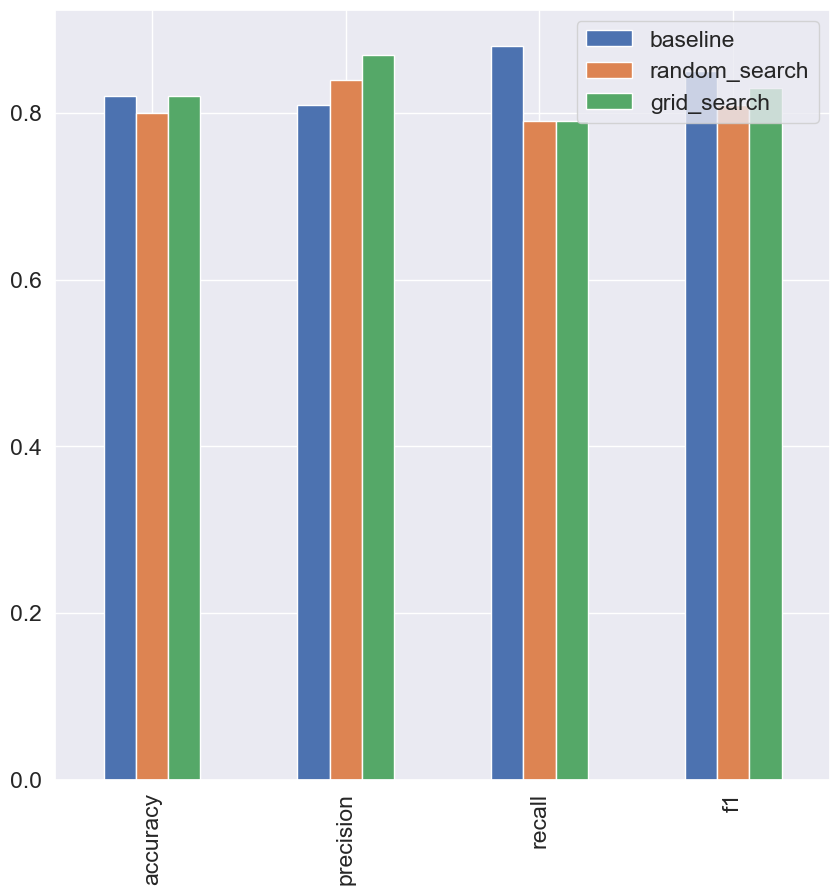

In [284]:
## Compare all the metrics
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "random_search": random_search_metrics,
    "grid_search" : grid_search_metrics
})

compare_metrics.plot.bar(figsize=(10, 10))

## Save and Load a trained model

In [285]:
## using sklearn pipeline

# String together a few skleran functionality into a process
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales



,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [286]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [288]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Put all of the steps in one cell for refinement process
1. Fill missing data
2. convert data to numbers
3. build model on data

In [296]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")

# drop rows that are missing price labels
car_sales.dropna(subset=["Price"], inplace=True)

# make transformation to get data ready for ML training
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

## Setup preprocessing steps (fill in missing values and convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_features),
    ("num", numeric_transformer, numeric_features)
])

# Create preprocessing modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split the data
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875

In [291]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64